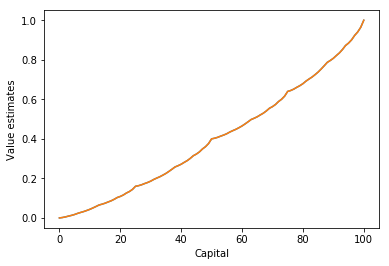

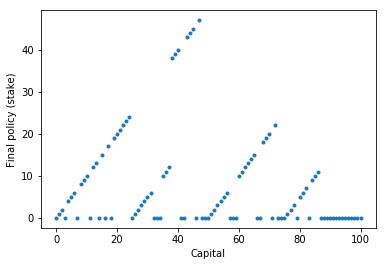

In [5]:
#######################################################################
# Copyright (C)                                                       #
# 2016 Shangtong Zhang(zhangshangtong.cpp@gmail.com)                  #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
# goal
GOAL = 100

# all states, including state 0 and state 100
states = np.arange(GOAL + 1)

# probability of head
headProb = 0.4

# optimal policy
policy = np.zeros(GOAL + 1)

# state value
stateValue = np.zeros(GOAL + 1)
stateValue[GOAL] = 1.0

# value iteration
while True:
    delta = 0.0
    for state in states[1:GOAL]:
        # get possilbe actions for current state
        actions = np.arange(min(state, GOAL - state) + 1)
        actionReturns = []
        for action in actions:
            actionReturns.append(headProb * stateValue[state + action] + (1 - headProb) * stateValue[state - action])
        newValue = np.max(actionReturns)
        delta += np.abs(stateValue[state] - newValue)
        # update state value
        stateValue[state] = newValue
    if delta < 1e-9:
        break

# calculate the optimal policy
for state in states[1:GOAL]:
    actions = np.arange(min(state, GOAL - state) + 1)
    actionReturns = []
    for action in actions:
        actionReturns.append(headProb * stateValue[state + action] + (1 - headProb) * stateValue[state - action])
    # due to tie, can't reproduce the optimal policy in book
    policy[state] = actions[np.argmax(actionReturns)]

# figure 4.3
plt.figure(1)
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.plot(stateValue)
plt.figure(2)
plt.plot(states, policy, '.')
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.show()